In [1]:
import matplotlib.pyplot as plt
import torch
import sys
sys.path.append("../")
import cdatasets as ds
from nets import unet, dense

In [2]:
# ds = CutUltrasoundDataset()
data = ds.UltrasoundDataset()

def view_output_img(img):
    img = img.reshape((41, 25))
    plt.imshow(img)

In [10]:
model = unet.Net3d_3().to("cpu")
model_path = "/home/shared/armeet/ultrasound/models/unet-3d-1_01-15-2024_17:34:53/cp-2.pt"
model_path = "/home/shared/armeet/ultrasound/models/unet-3d-3_01-15-2024_23:54:41/cp-3.pt"
model.load_state_dict(torch.load(model_path, map_location="cpu"))
model.eval()

Net3d_3(
  (avg): AvgPool3d(kernel_size=(2, 1, 1), stride=(2, 1, 1), padding=0)
  (e1): encoder3d_block(
    (conv): conv3d_block(
      (c1): Conv3d(1, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=same)
      (bn1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (c2): Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=same)
      (bn2): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (pool): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (e2): encoder3d_block(
    (conv): conv3d_block(
      (c1): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=same)
      (bn1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (c2): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=same)
      (bn2): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [11]:
def compare(idx):
    fig, axes = plt.subplots(1, 2)

    x, y = data[idx]
    x = x[0].unsqueeze(0).unsqueeze(0)
    y = y.unsqueeze(0)
    y_pred = model(x).detach().numpy()

    axes[0].imshow(y.squeeze().reshape((41, 25)))
    axes[0].axis("off")
    axes[0].set_title(f"Ground Truth [{idx}]")

    axes[1].imshow(y_pred.squeeze().reshape((41, 25)))
    axes[1].axis("off")
    axes[1].set_title(f"Prediction [{idx}]")
    fig.show()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x8192 and 12032x1025)

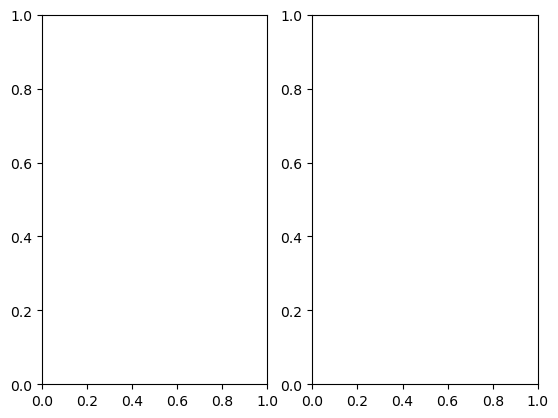

In [12]:
compare(1)

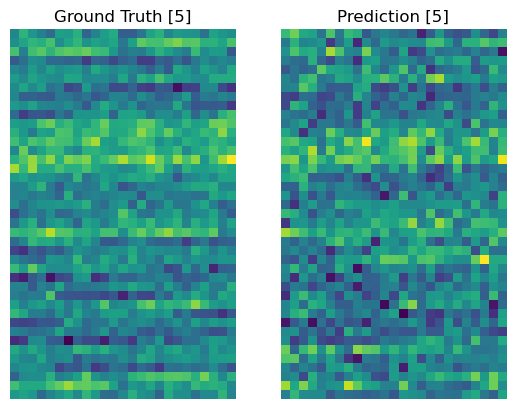

In [8]:
compare(5)

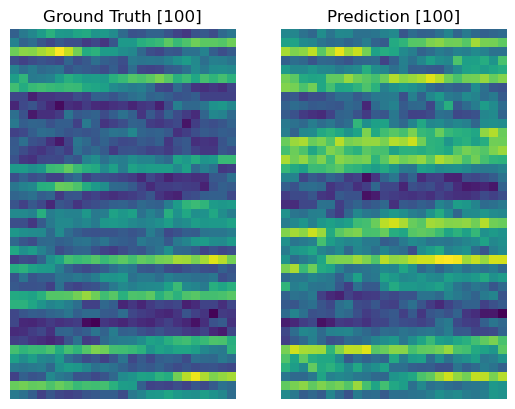

In [9]:
compare(100)

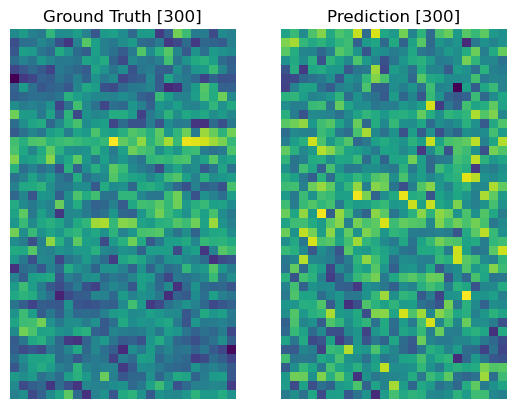

In [10]:
compare(300)

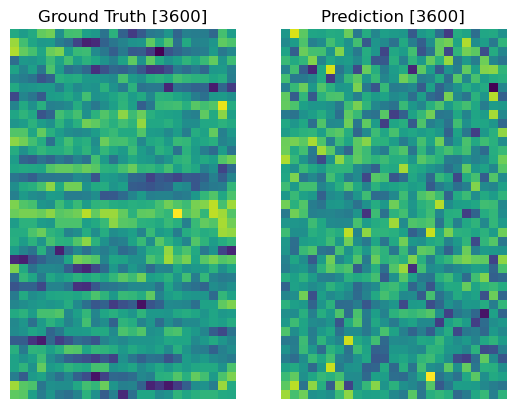

In [11]:
compare(3600)

In [7]:
def compare_plot(idx):
    fig, axes = plt.subplots(figsize=(20, 3))

    x, y = data[idx]
    x = x[0].unsqueeze(0).unsqueeze(0)
    y = y.unsqueeze(0)
    y_pred = model(x).detach().numpy()

    axes.plot(range(1025), y.squeeze(), label="truth")
    axes.set_title(f"Sample [{idx}]")

    axes.plot(range(1025), y_pred.squeeze(), label="pred")
    axes.legend()
    fig.show()

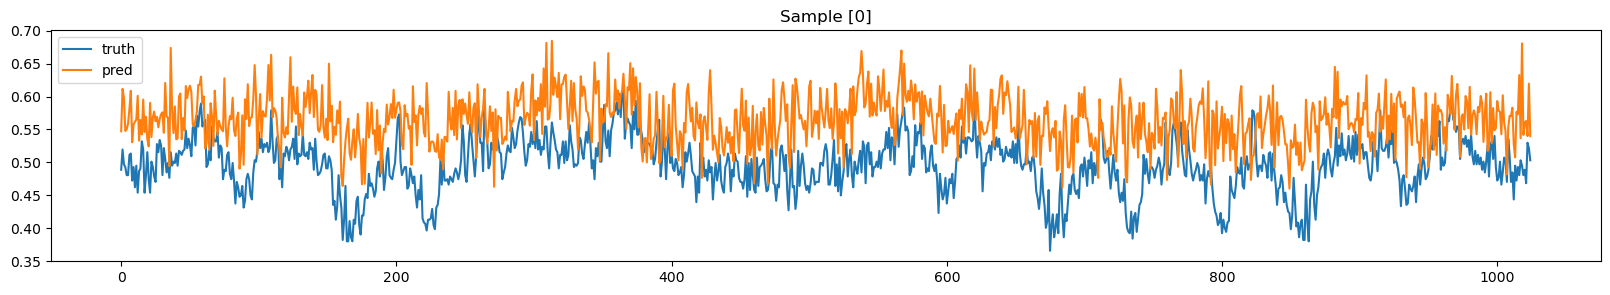

In [8]:
compare_plot(0)

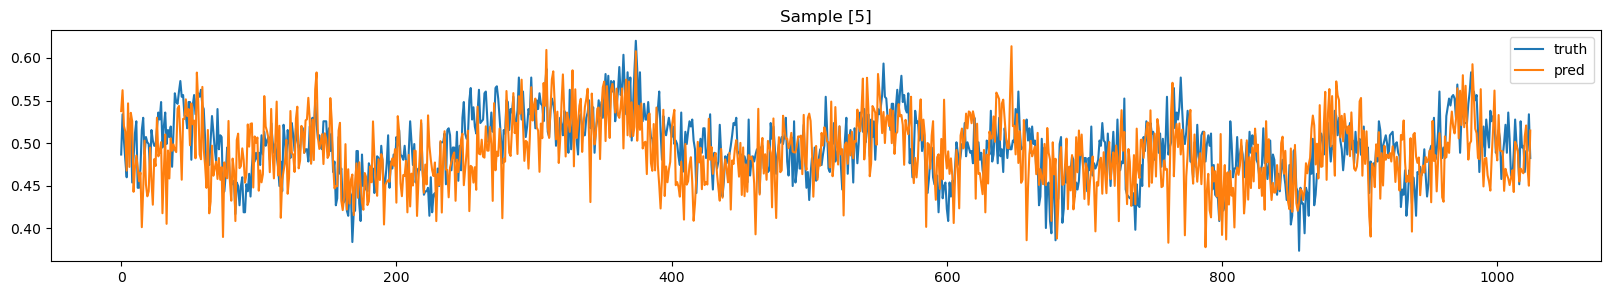

In [14]:

compare_plot(5)

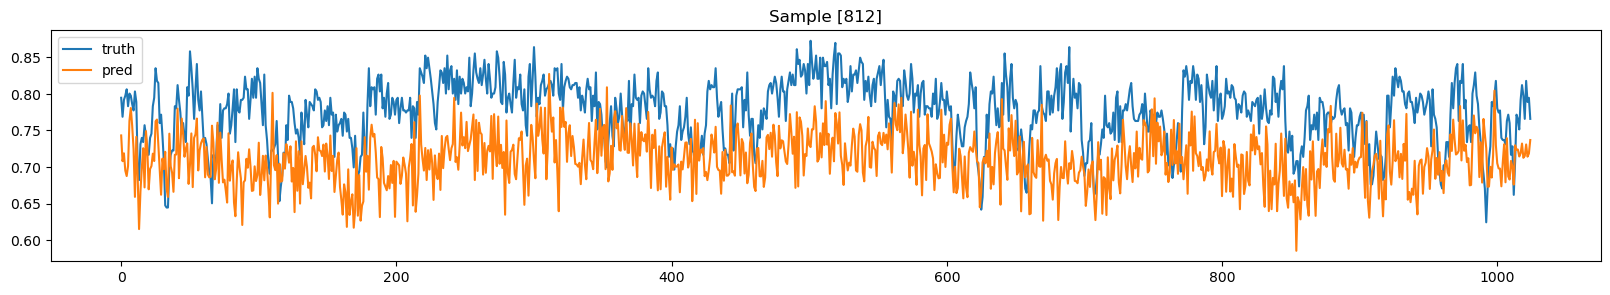

In [15]:
compare_plot(812)

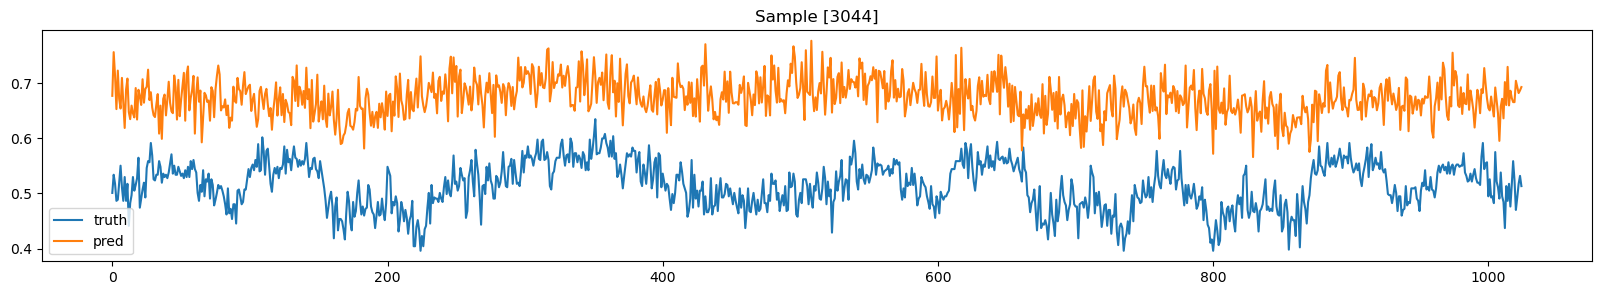

In [20]:
compare_plot(3044)

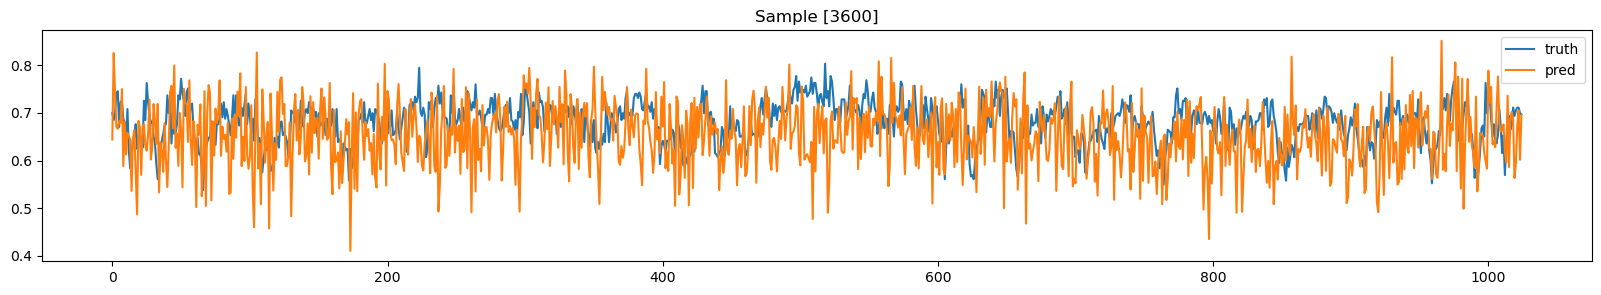

In [21]:
compare_plot(3600)

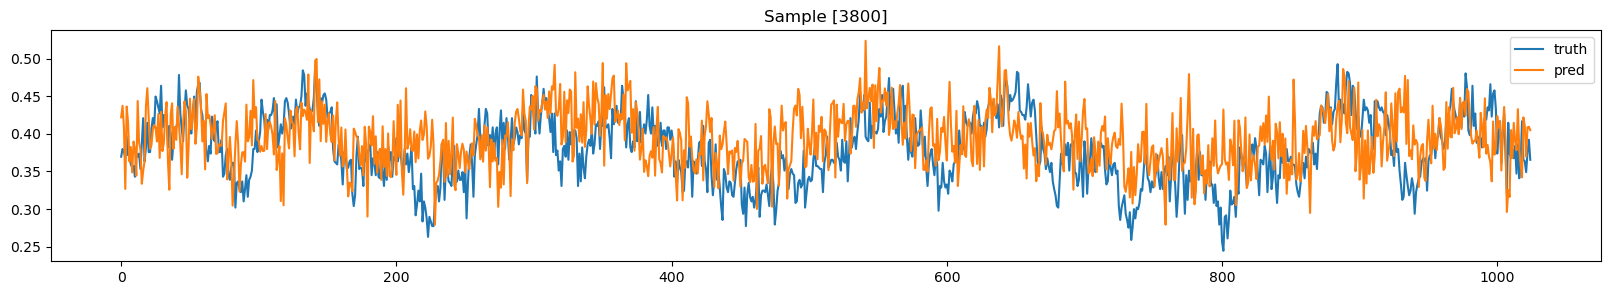

In [22]:
compare_plot(3800)

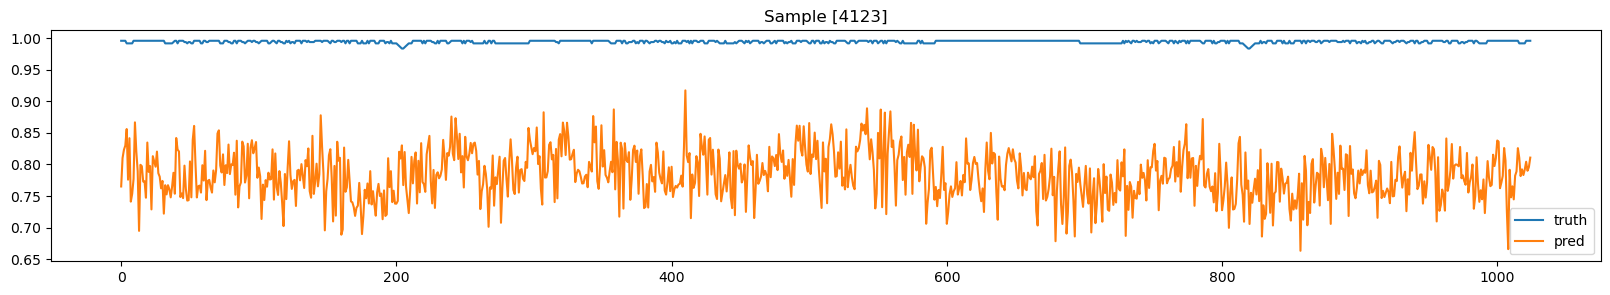

In [25]:
compare_plot(4123)